<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales2026/blob/main/Semana2/Graficacion3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Necesitamos definir el conjunto de soporte del campo
# Un lattice
N = 5
x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)

In [8]:
x

array([-5. , -2.5,  0. ,  2.5,  5. ])

In [9]:
y

array([-5. , -2.5,  0. ,  2.5,  5. ])

In [10]:
# Dominio del soporte
X,Y = np.meshgrid(x,y)

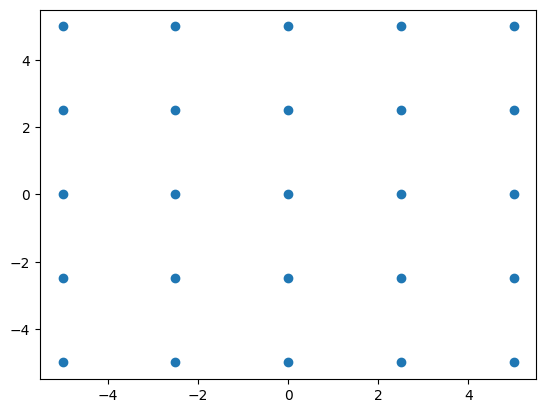

In [11]:
plt.scatter(X,Y)

In [12]:
def f2(x,y):
  return np.sin(x) + 5*np.cos(y)

In [13]:
# Definimos la imagen
Z = np.zeros_like(X)
Z

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [14]:
for i in range(N):
  for j in range(N):
    Z[i,j] = f2(x[i],y[j])

In [15]:
Z

array([[ 2.3772352 , -3.0467938 ,  5.95892427, -3.0467938 ,  2.3772352 ],
       [ 0.81983878, -4.60419022,  4.40152786, -4.60419022,  0.81983878],
       [ 1.41831093, -4.00571808,  5.        , -4.00571808,  1.41831093],
       [ 2.01678307, -3.40724593,  5.59847214, -3.40724593,  2.01678307],
       [ 0.45938665, -4.96464235,  4.04107573, -4.96464235,  0.45938665]])